In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

kushanknath_mushroomv1_path = kagglehub.dataset_download('kushanknath/mushroomv1')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroomv1/mushroom/expanded.Z
/kaggle/input/mushroomv1/mushroom/agaricus-lepiota.names
/kaggle/input/mushroomv1/mushroom/README
/kaggle/input/mushroomv1/mushroom/Index
/kaggle/input/mushroomv1/mushroom/agaricus-lepiota.data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset

In [ ]:
# Kaggle dataset path
path = '/kaggle/input/mushroomv1/mushroom/agaricus-lepiota.data'

# Defining columns based on the 'agaricus-lepiota.names' file
columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring",
    "stalk-surface-below-ring", "stalk-color-above-ring",
    "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
    "ring-type", "spore-print-color", "population", "habitat"
]

# Loading the data
df = pd.read_csv(path, header=None, names=columns)

print("Data Loaded Successfully!")
print(f"Dataset Shape: {df.shape}")
df

Data Loaded Successfully!
Dataset Shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Exploratory Data Analysis (EDA)

/tmp/ipykernel_55/1665777584.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='viridis')


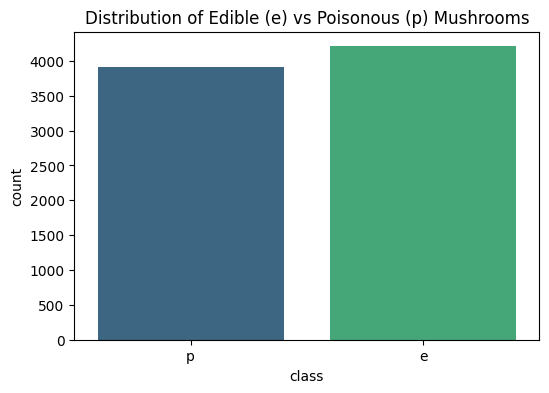

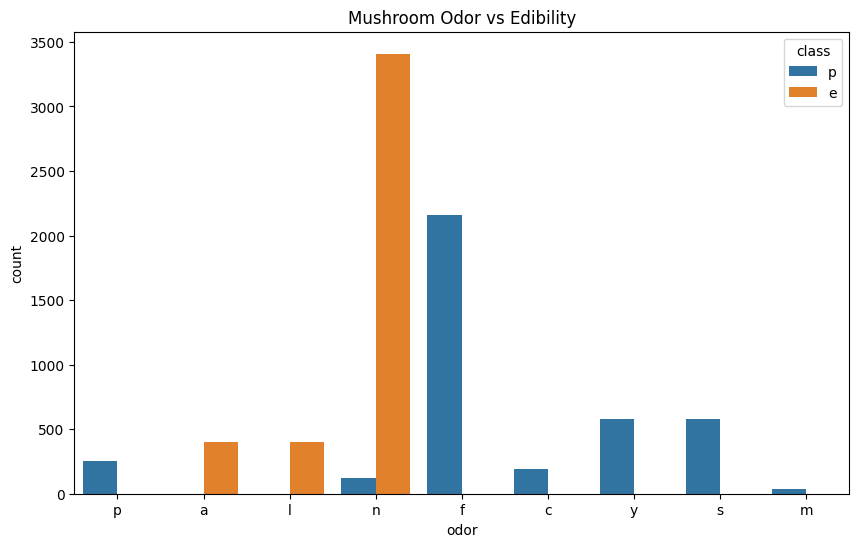

Missing values per column:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:

# 1. Target Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Distribution of Edible (e) vs Poisonous (p) Mushrooms')
plt.show()

# 2. Analyzing a key feature: Odor
# Odor is known to be a strong indicator of toxicity in this dataset
plt.figure(figsize=(10,6))
sns.countplot(x='odor', hue='class', data=df)
plt.title('Mushroom Odor vs Edibility')
plt.show()

# 3. Check for missing values
# Note: 'stalk-root' uses '?' for missing values in this dataset
print("Missing values per column:\n", df.isnull().sum())

# Data Preprocessing

In [ ]:
# Encode categorical features and target labels
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Splitting features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Splitting into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Preprocessing Complete. Data split into Train and Test sets.")

Preprocessing Complete. Data split into Train and Test sets.


# Decision Tree Classification

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)

print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, dt_preds))

Decision Tree Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# Random Forest - Evaluating

Random Forest with 1 estimators: Accuracy = 100.00%
Random Forest with 50 estimators: Accuracy = 100.00%
Random Forest with 100 estimators: Accuracy = 100.00%
Random Forest with 150 estimators: Accuracy = 100.00%
Random Forest with 200 estimators: Accuracy = 100.00%
Random Forest with 250 estimators: Accuracy = 100.00%


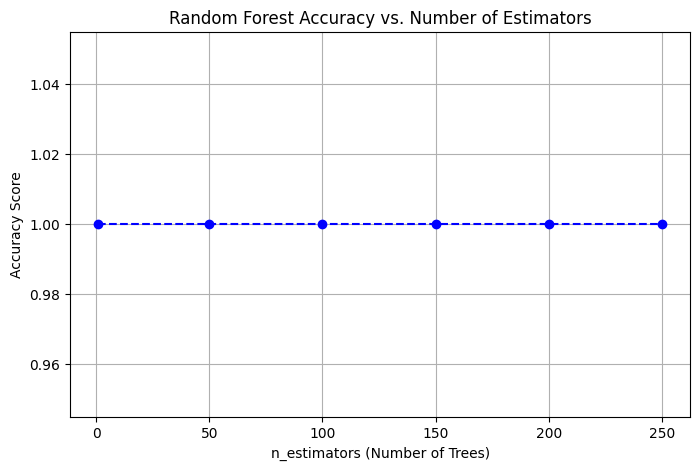

In [ ]:
n_estimators_list = [1, 50, 100, 150, 200, 250]
rf_results = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    rf_results.append(acc)
    print(f"Random Forest with {n} estimators: Accuracy = {acc * 100:.2f}%")

# Plotting the results
plt.figure(figsize=(8,5))
plt.plot(n_estimators_list, rf_results, marker='o', linestyle='--', color='b')
plt.xlabel('n_estimators (Number of Trees)')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Accuracy vs. Number of Estimators')
plt.grid(True)
plt.show()

# Final Comparison

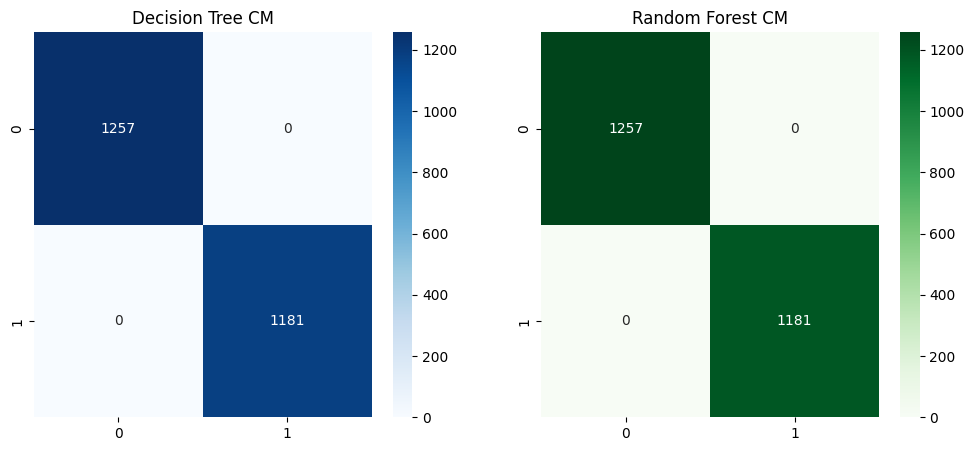

In [ ]:
# Final Random Forest model
final_rf = RandomForestClassifier(n_estimators=100, random_state=42)
final_rf.fit(X_train, y_train)
rf_preds = final_rf.predict(X_test)

# Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Decision Tree CM')

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title('Random Forest CM')

plt.show()